In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 11.2MB/s 
     |████████████████████████████████| 194kB 23.6MB/s 
     |████████████████████████████████| 1.2MB 23.7MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
pattern_types = 'double_top', 'double_bottom', 'head_and_shoulders', 'inverse_head_and_shoulders', 'reversal_rising_wedge', 'reversal_falling_wedge', 
'continuous_rising_wedge', 'continuous_falling_wedge', 'bullish_rectangle', 'bearish_rectangle', 'bullish_pennant', 'bearish_pennant'
path = Path('gdrive/MyDrive/pattern')

In [4]:
fns = get_image_files(path)
fns

(#865) [Path('gdrive/MyDrive/pattern/head_and_shoulder/3.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/일루미나.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/레킷벤키저.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/CVS 케어마크.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/Ping An Bank.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/시그나.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/JP모건 체이스.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/33.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/35.png'),Path('gdrive/MyDrive/pattern/head_and_shoulder/Wells Fargo _ Co.png')...]

In [5]:
failed = verify_images(fns)
failed

(#0) []

In [6]:
patterns = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

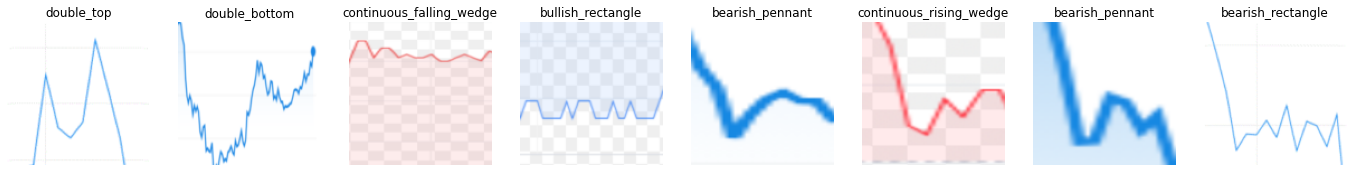

In [7]:
patterns = patterns.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = patterns.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=1)

In [8]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,3.272832,1.990896,0.589595,00:05


epoch,train_loss,valid_loss,error_rate,time
0,1.949599,1.436010,0.468208,00:06
1,1.524561,1.142403,0.393064,00:06
2,1.150653,1.038043,0.306358,00:06
3,0.870162,0.905547,0.242775,00:06
4,0.660133,0.894733,0.271676,00:06
5,0.515173,0.885342,0.242775,00:06
6,0.409117,0.898365,0.236994,00:06
7,0.332402,0.893774,0.236994,00:06


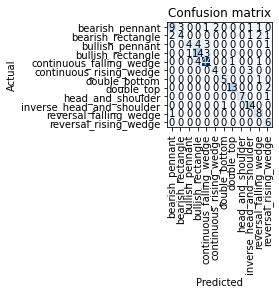

In [9]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

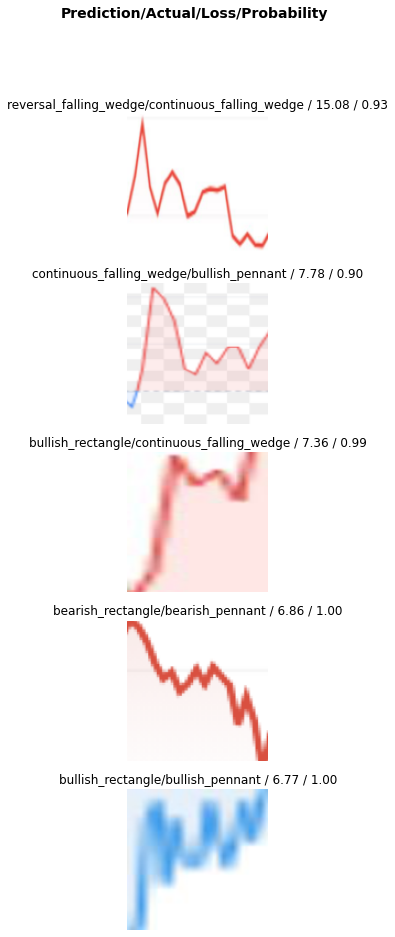

In [11]:
interp.plot_top_losses(5, nrows=5)

In [12]:
learn.export()

In [13]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]